<a href="https://colab.research.google.com/github/Sadrasadeghi/Analysis-of-Pumped-Hydro-Energy-Storage-in-Great-Britain-s-Electrical-Network/blob/main/Analysis_the_flexibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('espeniWithNegPSvalues.ztsd.parquet')
df.head()

,ELEXM_SETTLEMENT_DATE,ELEXM_SETTLEMENT_PERIOD,ELEXM_utc,ELEXM_localtime,ELEXM_ROWFLAG,NGEM_ROWFLAG,POWER_ESPENI_MW,POWER_ELEXM_CCGT_MW,POWER_ELEXM_OIL_MW,POWER_ELEXM_COAL_MW,...,POWER_ELEXM_BIOMASS_POSTCALC_MW,POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW,POWER_NGEM_EMBEDDED_WIND_GENERATION_MW,POWER_NGEM_BRITNED_FLOW_MW,POWER_NGEM_EAST_WEST_FLOW_MW,POWER_NGEM_MOYLE_FLOW_MW,POWER_NGEM_NEMO_FLOW_MW,POWER_NGEM_IFA_FLOW_MW,POWER_NGEM_IFA2_FLOW_MW,POWER_NGEM_NSL_FLOW_MW
sdsp,,,,,,,,,,,,,,,,,,,,,
2008-11-05_43,2008-11-05,43,2008-11-05T21:00:00+00:00,2008-11-05T21:00:00+00:00,1,1,44020,16468,0,19525,...,0,0,129,0,0,-59,NaN,1355,NaN,NaN
2008-11-05_44,2008-11-05,44,2008-11-05T21:30:00+00:00,2008-11-05T21:30:00+00:00,1,1,42169,15240,0,18892,...,0,0,71,0,0,-59,NaN,1386,NaN,NaN
2008-11-05_45,2008-11-05,45,2008-11-05T22:00:00+00:00,2008-11-05T22:00:00+00:00,1,1,40228,14402,0,18154,...,0,0,71,0,0,-59,NaN,1361,NaN,NaN
2008-11-05_46,2008-11-05,46,2008-11-05T22:30:00+00:00,2008-11-05T22:30:00+00:00,1,1,38349,13170,0,17843,...,0,0,40,0,0,-59,NaN,1361,NaN,NaN
2008-11-05_47,2008-11-05,47,2008-11-05T23:00:00+00:00,2008-11-05T23:00:00+00:00,1,1,37640,12520,0,17339,...,0,0,40,0,0,-59,NaN,1841,NaN,NaN


In [ ]:
df['ELEXM_SETTLEMENT_DATE'] = pd.to_datetime(df['ELEXM_SETTLEMENT_DATE'], utc=True)

df['YEAR'] = df['ELEXM_SETTLEMENT_DATE'].dt.year
df.set_index('YEAR', inplace=True)

# take absolute values for POWER_ELEXM_PS_MW column (new coluumn produced)
df['POWER_ELEXM_PS_MW_abs'] = abs(df['POWER_ELEXM_PS_MW'])

# combine wind & embedded wind generation columns
df['POWER_ELEXM_WIND_MW_TOTAL'] = df['POWER_ELEXM_WIND_MW'] + df['POWER_NGEM_EMBEDDED_WIND_GENERATION_MW']

df.drop(['ELEXM_utc', 'ELEXM_SETTLEMENT_DATE', 'ELEXM_SETTLEMENT_PERIOD', 'ELEXM_localtime', 'ELEXM_ROWFLAG', 'NGEM_ROWFLAG', 'POWER_ESPENI_MW', 'POWER_ELEXM_PS_MW', 'POWER_ELEXM_WIND_MW', 'POWER_NGEM_EMBEDDED_WIND_GENERATION_MW'], axis=1, inplace=True)

df_delta = df.apply(lambda x : (abs(x.diff().shift(-1)))/1000000)

df_delta_sum = df_delta.groupby(['YEAR']).sum()

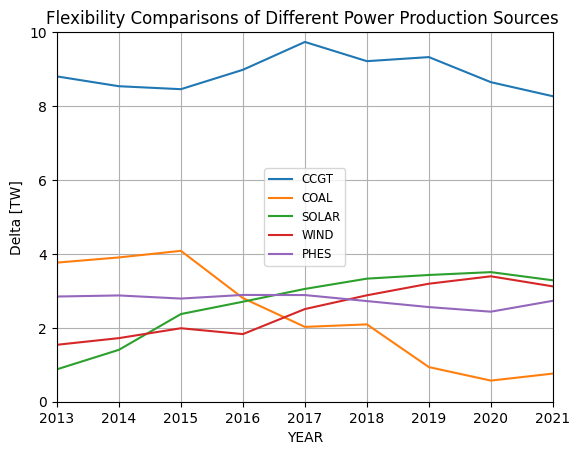

In [ ]:
plt.plot(df_delta_sum['POWER_ELEXM_CCGT_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_COAL_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_NGEM_EMBEDDED_SOLAR_GENERATION_MW'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_WIND_MW_TOTAL'].iloc[5:14])
plt.plot(df_delta_sum['POWER_ELEXM_PS_MW_abs'].iloc[5:14])
plt.legend(['CCGT', 'COAL', 'SOLAR', 'WIND', 'PHES'], fontsize='small', loc='center')
plt.title('Flexibility Comparisons of Different Power Production Sources ')
plt.grid()
plt.ylim([0, 10])
plt.xlabel('YEAR')
plt.ylabel('Delta [TW]')
plt.margins(x=0)